<a href="https://colab.research.google.com/github/venkateshblks/Data-Science-Assignment-eCommerce-Transactions/blob/main/Bantupalli_Venkateswararao_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import gdown
ids = {
    '1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE': 'customers.csv',
    '1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0': 'products.csv',
    '1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF': 'transactions.csv',
}

for file_id, output_filename in ids.items():
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, output_filename, quiet=False)
    print(f'Downloaded {output_filename}')

Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 17.5MB/s]


Downloaded customers.csv


Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 11.4MB/s]


Downloaded products.csv


Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 52.9MB/s]

Downloaded transactions.csv


In [3]:
customers=pd.read_csv('customers.csv')
products=pd.read_csv('products.csv')
transactions=pd.read_csv('transactions.csv')

In [4]:
display(customers.head(3))
display(customers.shape)
display(products.head(3))
display(products.shape)
display(transactions.head(3))
transactions.shape

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


(200, 4)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


(100, 4)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


(1000, 7)

In [6]:
merged_df = transactions.merge(customers, on='CustomerID', how='left')
merged_df = merged_df.merge(products, on='ProductID', how='left')
merged_df = merged_df.drop(columns=['Price_y'])
merged_df = merged_df.rename(columns={'Price_x': 'Price'})
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


# Customer Segmentation / Clustering

In [7]:
transaction_features = merged_df.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    NumTransactions=('TransactionID', 'count'),
    AverageTransactionValue=('TotalValue', 'mean')
).reset_index()
transaction_features.head(3)

,CustomerID,TotalSpent,NumTransactions,AverageTransactionValue
0,C0001,3354.52,5,670.904
1,C0002,1862.74,4,465.685
2,C0003,2725.38,4,681.345


In [8]:
customer_pro = merged_df[['CustomerID', 'Region',]].drop_duplicates()
customer_pro.head(3)

,CustomerID,Region
0,C0199,Europe
1,C0146,Asia
2,C0127,Europe


In [9]:
features = pd.merge(customer_pro, transaction_features, on='CustomerID')
features.head(3)

,CustomerID,Region,TotalSpent,NumTransactions,AverageTransactionValue
0,C0199,Europe,1979.28,4,494.820000
1,C0146,Asia,2570.80,4,642.700000
2,C0127,Europe,3232.88,6,538.813333


## Apply Clustering Algorithm (K-Means)

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt


In [19]:
imp_features=features[['Region', 'TotalSpent', 'NumTransactions', 'AverageTransactionValue']]
imp_features.head(3)

,Region,TotalSpent,NumTransactions,AverageTransactionValue
0,Europe,1979.28,4,494.820000
1,Asia,2570.80,4,642.700000
2,Europe,3232.88,6,538.813333


In [20]:
imp_features.dtypes

,0
Region,object
TotalSpent,float64
NumTransactions,int64
AverageTransactionValue,float64


In [21]:
features['Region'].value_counts()

,count
Region,
South America,59
Europe,50
North America,46
Asia,44


In [22]:
reg_map={'South America':1,
         'Europe':2,
         'North America':3,
         'Asia':4
         }
imp_features['Region']=imp_features['Region'].map(reg_map)
imp_features

,Region,TotalSpent,NumTransactions,AverageTransactionValue
0,2,1979.28,4,494.820000
1,4,2570.80,4,642.700000
2,2,3232.88,6,538.813333
3,1,6604.23,7,943.461429
4,2,3125.49,4,781.372500
...,...,...,...,...
194,3,396.34,1,396.340000
195,1,1284.27,2,642.135000
196,1,223.96,1,223.960000
197,4,995.52,1,995.520000


In [23]:
cluster_range = range(2, 11)
db_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(imp_features)
    db_score = davies_bouldin_score(imp_features, kmeans.labels_)
    db_scores.append(db_score)

In [24]:
db_scores

[0.5716733937633472,
 0.6300087187188144,
 0.5986808433263757,
 0.6034470875373239,
 0.6235941618229249,
 0.5351715056525046,
 0.5477567347541017,
 0.5958690915806595,
 0.6339396407249667]

**The Davies-Bouldin Index (DBI) is used to evaluate the clustering results, where lower values are better. A lower DBI indicates that the clusters are more compact and distinct, meaning they are well-separated and have low variance within each cluster**

Text(0, 0.5, 'Davies-Bouldin Index')

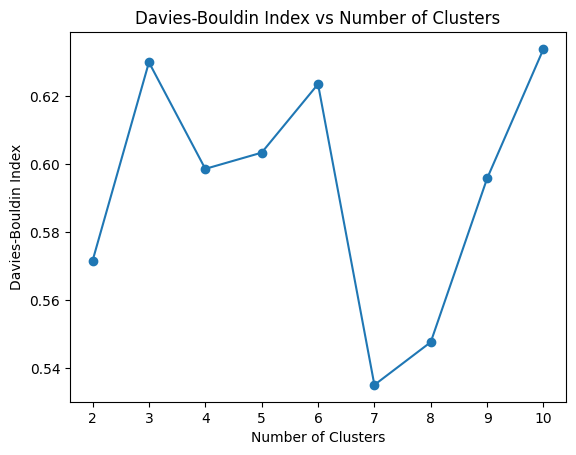

In [25]:
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

**k = 7 would be the best choice based on these DBI values.**

In [26]:
kmeans_final = KMeans(n_clusters=7)
kmeans_final.fit(imp_features)

KMeans(n_clusters=7)

In [27]:
features['Cluster']=kmeans_final.labels_
features.head(3)

,CustomerID,Region,TotalSpent,NumTransactions,AverageTransactionValue,Cluster
0,C0199,Europe,1979.28,4,494.820000,1
1,C0146,Asia,2570.80,4,642.700000,1
2,C0127,Europe,3232.88,6,538.813333,6


# Visualizing Cluster Distribution

## PCA Visualization

In [28]:
from sklearn.decomposition import PCA

# Perform PCA to reduce data to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(imp_features)

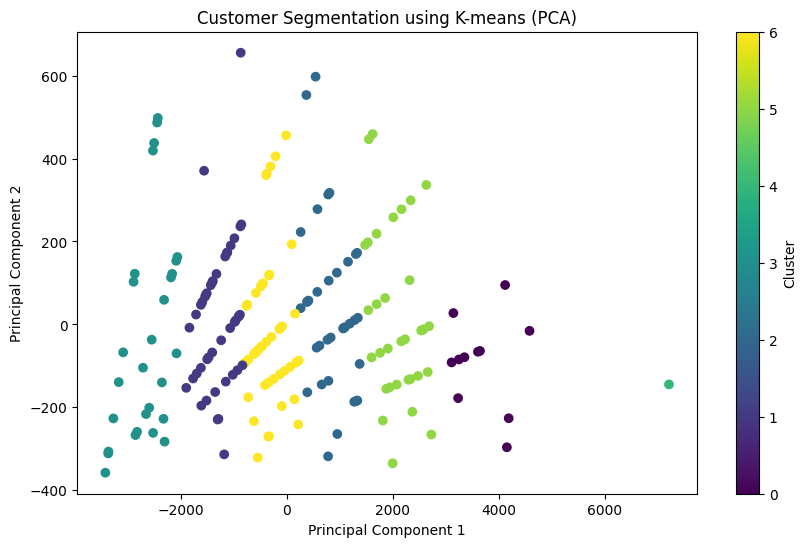

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=features['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation using K-means (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

## t-SNE Visualization

In [30]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce data to 2D
tsne = TSNE(n_components=2, random_state=42)
reduced_tsne = tsne.fit_transform(imp_features)

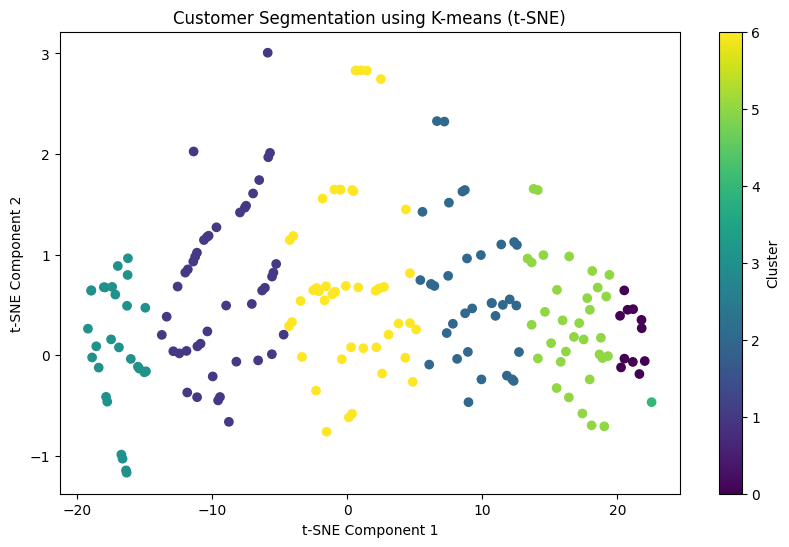

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], c=features['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation using K-means (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')

### Other relevant clustering metrics

In [34]:
wcss = []

# Loop over cluster sizes from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(imp_features)  # Use the feature matrix for clustering
    wcss.append(kmeans.inertia_)

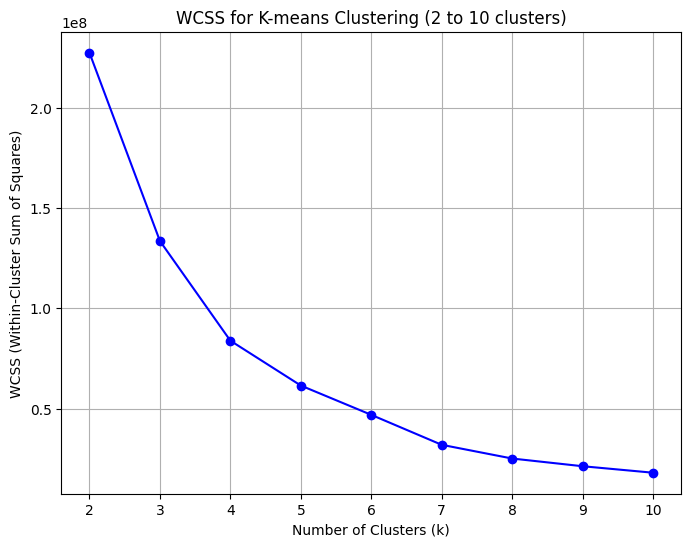

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', color='b', linestyle='-', markersize=6)
plt.title('WCSS for K-means Clustering (2 to 10 clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(2, 11))  # Set x-ticks for cluster values 2 to 10
plt.grid(True)

**k=7  where the WCSS starts decreasing more slowly as the number of clusters increases**

# Clustering Results Report

**Based on the analysis of the Davies-Bouldin Index (DBI), the optimal number of clusters for the customer segmentation task is 7. This is derived from the DBI scores for different values of k, where k=7 had the lowest DBI score, indicating that the clusters are well-separated and compact.**

**The Davies-Bouldin Index (DBI) for k = 7 is 0.5352**

**Lower DBI values indicate better clustering quality, as the clusters are more compact and distinct**

**The DBI for k=7 is the lowest among all cluster sizes tested (ranging from k=2 to k=10), making it the best choice for segmentation**

**To better evaluate the clustering, we can also consider the following metrics:**

### **Inertia (Within-Cluster Sum of Squares)**
**Inertia measures the sum of squared distances from each point to its assigned cluster's center. A lower inertia indicates that the data points are closer to their cluster centroids, meaning the clusters are more compact**


**k=7 where the WCSS starts decreasing more slowly as the number of clusters increases**

**7 clusters might be the optimal number of clusters for your customer segmentation task. The elbow point represents where adding more clusters doesn't significantly reduce the WCSS, indicating that additional clusters don't provide much improvement in compactness**